<a href="https://colab.research.google.com/github/Marlyng26/Atomsphere-Analysis/blob/main/Activity_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Addapted from Regression Analysis with Python by Luca Massaron and Alberto Boshettti
CHAPTER 4 - LOGISTIC REGRESSION

## We first create a dummy dataset. What is a dummy dataset?

##### 1. Enter Answer Here

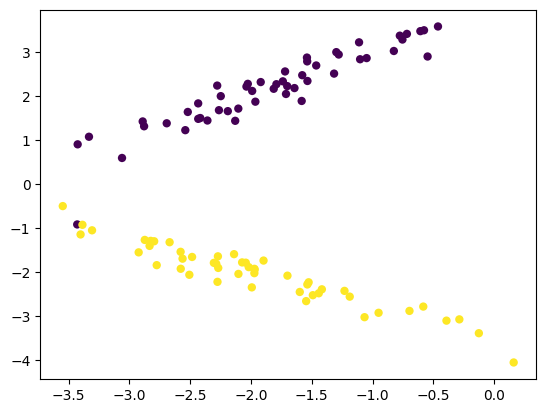

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep = 2.0, random_state=101)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, linewidth=0, edgecolor=None)
plt.show()

##### Please provide a brief summary of what we accomplished in the cell run above.

##### 2.Enter Answer here

In [ ]:
y_orig = [0,0,0,0,0,0,1,1,1,1]
y_pred = [0,0,0,0,1,1,1,1,1,0]
#What is y_orig and y_pred?

##### 3.Enter Answer here

## Measuring the classifier's performance

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_orig, y_pred)
#What is sklearn?What is a confusion matrix?

array([[4, 2],
       [1, 3]])



```
# This is formatted as code
```

##### 4. Enter Answer here

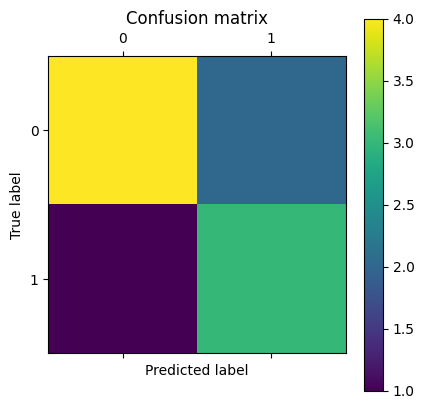

In [ ]:
plt.matshow(confusion_matrix(y_orig, y_pred))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
#Please briefly descripe the output.

##### 5.Enter Answer here

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_orig, y_pred)

0.7

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_orig, y_pred)

0.6

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_orig, y_pred)

0.75

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_orig, y_pred)

0.6666666666666666

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_orig, y_pred))
#Define precision and recall. Interpret the output.

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



##### 6. Enter Answer here

## Fitting the classifier

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float),
                                   test_size=0.33, random_state=101)


In [ ]:
y_test.dtype

dtype('float64')

In [ ]:
y_test

array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.])

In [ ]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)
regr.predict(X_test)
#Please provide a brief explanation about the syntax entered in this cell and the output obtained.

array([-0.19021825,  1.14481132,  1.16345687,  0.00906543,  0.17492642,
        0.75010591,  0.01764075,  0.69408067,  0.99490823,  0.98471815,
        0.01184894,  0.91408215,  0.77985749,  0.66302112,  0.04339816,
        0.19057929,  1.19126856,  0.01473595,  0.80911677, -0.03827048,
       -0.08450995, -0.22769924,  0.57176711,  0.75836004,  1.02104676,
        1.06148483,  0.873505  ,  1.04779876, -0.1655144 ,  0.66570701,
       -0.01700988,  1.03270133,  0.00856569])

##### 7. Enter Answer here

## The sigmoid (logit) function

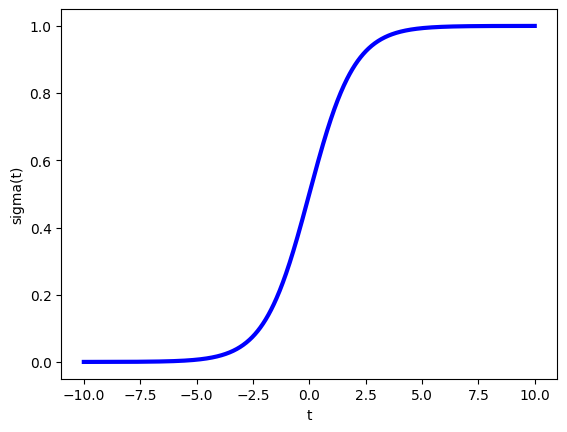

In [ ]:
import numpy as np

def model(x):
    return 1 / (1 + np.exp(-x))

X_vals = np.linspace(-10, 10, 1000)
plt.plot(X_vals, model(X_vals), color='blue', linewidth=3)
plt.ylabel('sigma(t)')
plt.xlabel('t')

plt.show()

## Classification and decision boundaries

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

print(classification_report(y_test, y_clf))
#Interpret the output

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        15
         1.0       0.95      1.00      0.97        18

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



##### 8.Enter Answer here

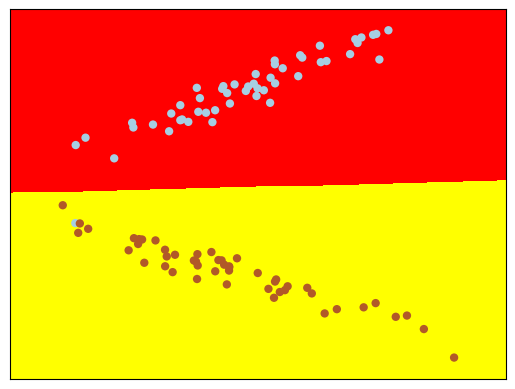

In [ ]:
# Example based on:
# Code source: Gaël Varoquaux, Modified for documentation by Jaques Grobler, License: BSD 3 clause

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', linewidth=0, cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

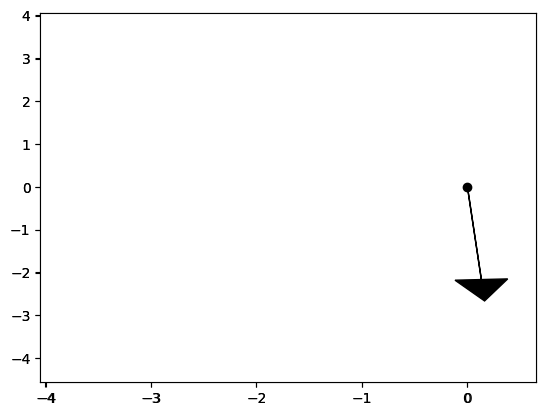

In [ ]:
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

ax = plt.axes()
ax.arrow(0, 0, clf.coef_[0][0], clf.coef_[0][1], head_width=0.5, head_length=0.5, fc='k', ec='k')
plt.scatter(0, 0, marker='o', c='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [ ]:
clf.coef_

array([[ 0.13217176, -2.16243563]])

In [ ]:
%timeit clf.fit(X, y)

3.95 ms ± 779 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit clf.predict(X)

118 µs ± 7.23 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%timeit clf.predict_proba(X)

167 µs ± 7.79 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
# Clean all previous variables
%reset -f

## Multiclass Logistic Regression

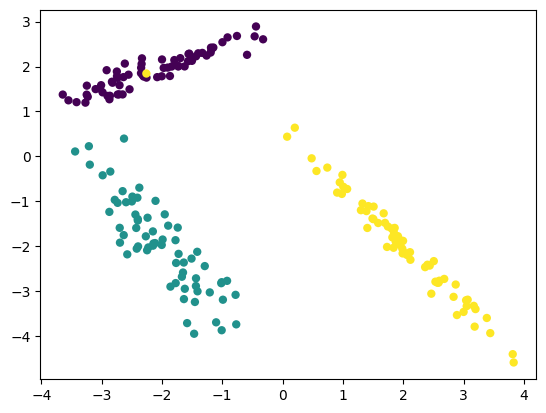

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=2,
                           n_classes=3, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep = 2.0, random_state=101)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, linewidth=0, edgecolor=None)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float),
                                   test_size=0.33, random_state=101)
#Interpret the syntax

##### 9. Enter Answer here

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_clf))
#Interpret the output

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        24
         1.0       1.00      1.00      1.00        22
         2.0       1.00      1.00      1.00        20

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



##### 10. Enter Answer here

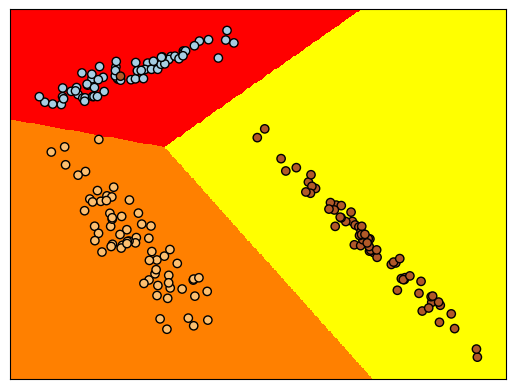

In [ ]:
import numpy as np

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
print(X_test[0])
print(y_test[0])
print(y_clf[0])

[-3.26744968  1.19639333]
0.0
0


In [ ]:
#clf.predict_proba(X_test[0])

In [ ]:
#clf.decision_function(X_test[0])

# An example

In [ ]:
X, y = make_classification(n_samples=10000, n_features=10,
                           n_informative=10, n_redundant=0,
                           random_state=101)

## Using statsmodels

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
#Interpret the syntax

##### 11. Enter Answer here

In [ ]:
Xc = sm.add_constant(X)
logistic_regression = sm.Logit(y,Xc)
fitted_model = logistic_regression.fit()

Optimization terminated successfully.
         Current function value: 0.438685
         Iterations 7


In [ ]:
fitted_model.summary()
#Interpret the output.

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Tue, 05 Nov 2024   Pseudo R-squ.:                  0.3671
Time:                        00:46:13   Log-Likelihood:                -4386.8
converged:                       True   LL-Null:                       -6931.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4299      0.039     11.023      0.000       0.353       0.506
x1             0.0671      0.015      4.410      0.000       0.037       0.097
x2            -0.7828      0.019    -41.947      0.000      -0.819      -0.746
x3             0.1221      0.016      7.815      0.000       0.091       0.153
x4             0.2841      0.016     18.150      0.000       0.253       0.315
x5             0.1469      0.014     10.283      0.000       0.119       0.175
x6            -0.3414      0.019    -17.636      0.000      -0.379      -0.303
x7             0.0503      0.014      3.481      0.000       0.022       0.079
x8            -0.1393      0.014     -9.642      0.000      -0.168      -0.111
x9             0.1127      0.014      7.931      0.000       0.085       0.141
x10           -0.4792      0.018    -27.340      0.000      -0.514      -0.445
==============================================================================
"""

##### 12. Enter Answer here

In [ ]:
import pandas as pd

# As an alternative, this example is using the statsmodels.formula.api module
# Equivalent to the R syntax for linear models, it requires to specify the form
# of the logistic regression using 'response ~ predictor1 (+ predictor2 + ...)'

Xd = pd.DataFrame(X)
Xd.columns = ['VAR'+str(i+1) for i in range(10)]
Xd['response'] = y

logistic_regression = smf.logit(
    formula = 'response ~ VAR1+ VAR2 + VAR3 + VAR4 + \
               VAR5 + VAR6 + VAR7 + VAR8 + VAR9 + VAR10',
               data=Xd)

fitted_model = logistic_regression.fit()
fitted_model.summary()

Optimization terminated successfully.
         Current function value: 0.438685
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               response   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Tue, 05 Nov 2024   Pseudo R-squ.:                  0.3671
Time:                        00:46:13   Log-Likelihood:                -4386.8
converged:                       True   LL-Null:                       -6931.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4299      0.039     11.023      0.000       0.353       0.506
VAR1           0.0671      0.015      4.410      0.000       0.037       0.097
VAR2          -0.7828      0.019    -41.947      0.000      -0.819      -0.746
VAR3           0.1221      0.016      7.815      0.000       0.091       0.153
VAR4           0.2841      0.016     18.150      0.000       0.253       0.315
VAR5           0.1469      0.014     10.283      0.000       0.119       0.175
VAR6          -0.3414      0.019    -17.636      0.000      -0.379      -0.303
VAR7           0.0503      0.014      3.481      0.000       0.022       0.079
VAR8          -0.1393      0.014     -9.642      0.000      -0.168      -0.111
VAR9           0.1127      0.014      7.931      0.000       0.085       0.141
VAR10         -0.4792      0.018    -27.340      0.000      -0.514      -0.445
==============================================================================
"""

## Scikit-Learn implementations

In [ ]:
from sklearn.linear_model import LogisticRegression

# C: Inverse of regularization strength; must be a positive float.
# tol: Tolerance for stopping criteria.

clf = LogisticRegression(C=1E4, tol=1E-25, random_state=101)
clf.fit(X,y)

LogisticRegression(C=10000.0, random_state=101, tol=1e-25)

In [ ]:
coeffs = [clf.intercept_[0]]
coeffs.extend(clf.coef_[0])
coeffs

[0.42991406323587705,
 0.0670770770250955,
 -0.782795786790291,
 0.12208732520731162,
 0.28410277820708263,
 0.14689341099613903,
 -0.341434348131418,
 0.05031073777165631,
 -0.13932058299297898,
 0.11267403609611301,
 -0.4791690595026256]

In [ ]:
from sklearn.linear_model import SGDClassifier

# alpha: Constant that multiplies the regularization term.
# n_iter: The number of passes over the training data (aka epochs).
# Use 'log_loss' instead of 'log' for logistic regression

max_iter = int(1E2) # Explicitly cast to int

if not isinstance(max_iter, int):

 raise ValueError("max_iter must be an integer")

clf = SGDClassifier(loss="log_loss", alpha=1E-4, max_iter=max_iter, random_state=101)
clf.fit(X,y)

SGDClassifier(loss='log_loss', max_iter=100, random_state=101)

In [ ]:
coeffs = [clf.intercept_[0]]
coeffs.extend(clf.coef_[0])
coeffs

[0.5068696712956766,
 0.07050280848520935,
 -0.8883796065101689,
 0.035243356793984874,
 0.3365883619636313,
 0.25553182942942876,
 -0.4676029213686756,
 0.148533306190256,
 -0.2201228601370435,
 0.14601029105324695,
 -0.46884033201017616]